In [2]:
# Tweepy - Python library for accessing the Twitter API.
import tweepy

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

Loading the Config file 

In [3]:
config = pd.read_csv("./app_credentials.csv")

In [5]:
# Twitter API config
twitterApiKey = config['twitterApiKey'][0]
twitterApiSecret = config['twitterApiSecret'][0]
twitterApiAccessToken = config['twitterApiAccessToken'][0]
twitterApiAccessTokenSecret = config['twitterApiAccessTokenSecret'][0]

In [6]:
# Authenticate
auth = tweepy.OAuthHandler(twitterApiKey, twitterApiSecret)
auth.set_access_token(twitterApiAccessToken, twitterApiAccessTokenSecret)
twetterApi = tweepy.API(auth, wait_on_rate_limit = True)

In [7]:
twitterAccount = "elonmusk"

In [8]:
tweets = tweepy.Cursor(twetterApi.user_timeline, 
                        screen_name=twitterAccount, 
                        count=None,
                        since_id=None,
                        max_id=None,
                        trim_user=True,
                        exclude_replies=True,
                        contributor_details=False,
                        include_entities=False
                        ).items(50);

In [9]:
df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweet'])

In [10]:
df.head(50)

,Tweet
0,Launch underway https://t.co/wbk7ZZ0Fqx
1,"Btw, critical feedback is always super appreci..."
2,https://t.co/2ja38Z8MRE
3,Use Signal
4,The most entertaining outcome is the most likely
5,This is called the domino effect https://t.co/...
6,Snow falling on Giga Berlin https://t.co/eTXMt...
7,So proud of the Tesla team for achieving this ...
8,"RT @Tesla: In 2020, we produced and delivered ..."
9,Great interview with Mathias Döpfner\nhttps://...


Create a say cleanUpTweet function that will:

    remove mentions
    remove hashtags
    remove retweets
    remove urls


In [11]:
# Function for cleaning the tweets

def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    
    #r' means we are passing raw strings
    
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    # remove spaces
    txt = re.sub(r'  ', ' ', txt)
    return txt

In [12]:
df['Tweet'] = df['Tweet'].apply(cleanUpTweet)

In [13]:
df.head(50)

,Tweet
0,Launch underway
1,"Btw, critical feedback is always super appreci..."
2,
3,Use Signal
4,The most entertaining outcome is the most likely
5,This is called the domino effect
6,Snow falling on Giga Berlin
7,So proud of the Tesla team for achieving this ...
8,"In 2020, we produced and delivered half a mill..."
9,Great interview with Mathias Döpfner\n


In [14]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [15]:
df['Subjectivity'] = df['Tweet'].apply(getTextSubjectivity)
df['Polarity'] = df['Tweet'].apply(getTextPolarity)

In [16]:
df.head(50)

,Tweet,Subjectivity,Polarity
0,Launch underway,0.000000,0.000000
1,"Btw, critical feedback is always super appreci...",0.353333,0.126667
2,,0.000000,0.000000
3,Use Signal,0.000000,0.000000
4,The most entertaining outcome is the most likely,0.675000,0.375000
5,This is called the domino effect,0.000000,0.000000
6,Snow falling on Giga Berlin,0.000000,0.000000
7,So proud of the Tesla team for achieving this ...,0.750000,0.439063
8,"In 2020, we produced and delivered half a mill...",0.566667,0.108333
9,Great interview with Mathias Döpfner\n,0.750000,0.800000


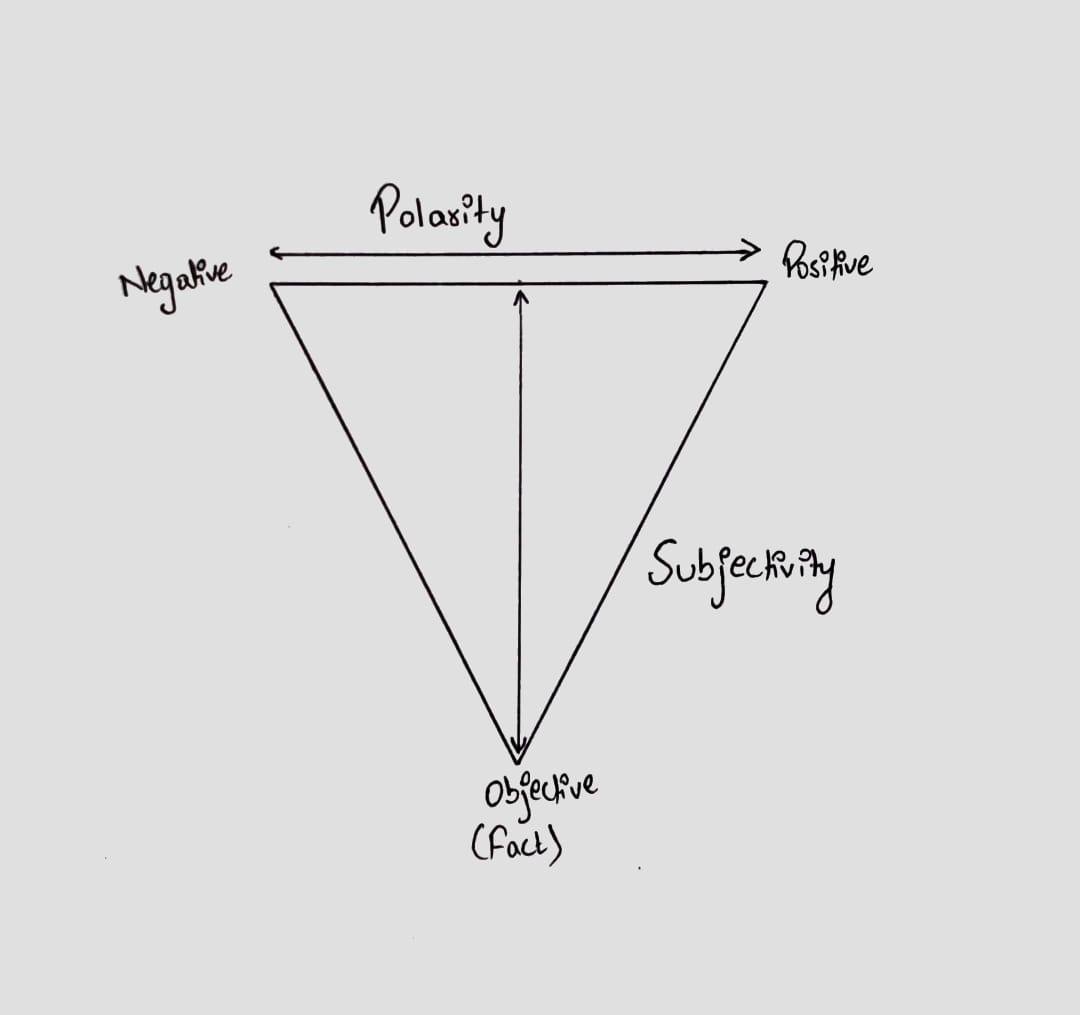